In [23]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load files
median_income = pd.read_csv('median_income.csv')
print(median_income.columns)
median_income

Index(['REF_DATE', 'GEO', 'DGUID', 'Age group', 'Sex', 'Income source',
       'Statistics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
       'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


,REF_DATE,GEO,DGUID,Age group,Sex,Income source,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Number of persons,Number,223,thousands,3,v107660854,1.1.1.1.1,16797.0,NaN,NaN,NaN,0
1,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Number with income,Number,223,thousands,3,v107660855,1.1.1.1.2,14167.0,NaN,NaN,NaN,0
2,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Aggregate income,2020 constant dollars,425,millions,6,v107660856,1.1.1.1.3,582340.0,NaN,NaN,NaN,0
3,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Average income (excluding zeros),2020 constant dollars,425,units,0,v107660857,1.1.1.1.4,41100.0,NaN,NaN,NaN,0
4,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,425,units,0,v107660858,1.1.1.1.5,32000.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703515,2020,"Vancouver, British Columbia",2011S0503933,65 years and over,Females,Other government transfers,Number of persons,Number,223,thousands,3,v107698649,21.8.3.15.1,241.0,C,NaN,NaN,0
1703516,2020,"Vancouver, British Columbia",2011S0503933,65 years and over,Females,Other government transfers,Number with income,Number,223,thousands,3,v107698650,21.8.3.15.2,159.0,C,NaN,NaN,0
1703517,2020,"Vancouver, British Columbia",2011S0503933,65 years and over,Females,Other government transfers,Aggregate income,2020 constant dollars,425,millions,6,v107698651,21.8.3.15.3,236.0,D,NaN,NaN,0
1703518,2020,"Vancouver, British Columbia",2011S0503933,65 years and over,Females,Other government transfers,Average income (excluding zeros),2020 constant dollars,425,units,0,v107698652,21.8.3.15.4,1500.0,D,NaN,NaN,0


In [3]:
columns = ['year', 'geo', 'DGUID', 'age_group', 'sex', 'income_source', 'statistics', 'unit', 'UOM_ID',
           'scalar_factor', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'value', 'status', 'SYMBOL',
           'TERMINATED', 'decimals']
median_income.columns = columns
median_income.columns

Index(['year', 'geo', 'DGUID', 'age_group', 'sex', 'income_source',
       'statistics', 'unit', 'UOM_ID', 'scalar_factor', 'SCALAR_ID', 'VECTOR',
       'COORDINATE', 'value', 'status', 'SYMBOL', 'TERMINATED', 'decimals'],
      dtype='object')

In [4]:
median_income = median_income.drop(['DGUID', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
             'SYMBOL', 'TERMINATED', 'decimals'], axis=1)
median_income.columns

Index(['year', 'geo', 'age_group', 'sex', 'income_source', 'statistics',
       'unit', 'scalar_factor', 'value', 'status'],
      dtype='object')

In [5]:
median_income.isna().sum()

year                  0
geo                   0
age_group             0
sex                   0
income_source         0
statistics            0
unit                  0
scalar_factor         0
value            395568
status           491608
dtype: int64

In [6]:
median_income = median_income.loc[(median_income.age_group == "16 years and over")
                                  & (median_income.sex == "Both sexes")
                                  & (median_income.income_source == "Total income")
                                  & (median_income.statistics == "Median income (excluding zeros)")]
median_income

,year,geo,age_group,sex,income_source,statistics,unit,scalar_factor,value,status
4,1976,Canada,16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,32000.0,NaN
1804,1976,Atlantic provinces,16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,25800.0,NaN
3604,1976,Newfoundland and Labrador,16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,24500.0,NaN
5404,1976,Prince Edward Island,16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,21100.0,NaN
7204,1976,Nova Scotia,16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,26600.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1693924,2020,"Toronto, Ontario",16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,36500.0,A
1695844,2020,"Winnipeg, Manitoba",16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,39600.0,A
1697764,2020,"Calgary, Alberta",16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,42900.0,B
1699684,2020,"Edmonton, Alberta",16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,units,43100.0,B


In [7]:
provinceList = ['Alberta', 'British Columbia', 'Saskatchewan', 'Manitoba', 'Ontario', 'Quebec',
               'New Brunswick', 'Nova Scotia', 'Prince Edward Island', 'Newfoundland and Labrador']
median_income = median_income[median_income['geo'].isin(provinceList)]

In [8]:
median_income.geo.value_counts()

Newfoundland and Labrador    45
Prince Edward Island         45
Nova Scotia                  45
New Brunswick                45
Quebec                       45
Ontario                      45
Manitoba                     45
Saskatchewan                 45
Alberta                      45
British Columbia             45
Name: geo, dtype: int64

In [9]:
median_income.dropna()
median_income.isna().sum()

year               0
geo                0
age_group          0
sex                0
income_source      0
statistics         0
unit               0
scalar_factor      0
value              0
status           170
dtype: int64

In [10]:
median_income = median_income.drop(['status', 'unit', 'income_source', 'sex', 'statistics', 'scalar_factor'], axis=1)
median_income['year'] = pd.to_datetime(median_income['year'], format='%Y')
median_income
median_income.to_excel("median_income_final.xlsx", index=False)

In [11]:
housing_affordability_index = pd.read_csv('housing_affordability_index1.csv')
print(housing_affordability_index.columns)
housing_affordability_index

Index(['date', 'INDINF_NHPI_Q', 'INDINF_AFFORD'], dtype='object')


,date,INDINF_NHPI_Q,INDINF_AFFORD
0,1980Q3,NaN,0.428
1,1980Q4,NaN,0.469
2,1981Q1,NaN,0.491
3,1981Q2,NaN,0.544
4,1981Q3,NaN,0.637
...,...,...,...
165,2021Q4,11.6,0.406
166,2022Q1,11.3,0.434
167,2022Q2,8.5,0.497
168,2022Q3,6.9,0.501


In [12]:
housing_affordability_index = housing_affordability_index.drop('INDINF_NHPI_Q', axis=1)
housing_affordability_index = housing_affordability_index[housing_affordability_index['date'].str[-1] == '3']
housing_affordability_index['date'] = pd.to_datetime(housing_affordability_index['date'].str[:4], format='%Y')
housing_affordability_index
housing_affordability_index.to_excel("housing_affordability_index_final.xlsx", index=False)

In [13]:
excel_file = 'house_price_index_seasonally_adjusted.xlsx'
Alberta_house_price = pd.read_excel(excel_file, sheet_name='ALBERTA')
Alberta_house_price['province'] = 'Alberta'
British_Columbia_house_price = pd.read_excel(excel_file, sheet_name='BRITISH_COLUMBIA')
British_Columbia_house_price['province'] = 'British Columbia'
Saskatchewan_house_price = pd.read_excel(excel_file, sheet_name='SASKATCHEWAN')
Saskatchewan_house_price['province'] = 'Saskatchewan'
Manitoba_house_price = pd.read_excel(excel_file, sheet_name='WINNIPEG')
Manitoba_house_price['province'] = 'Manitoba'
Ontario_house_price = pd.read_excel(excel_file, sheet_name='ONTARIO')
Ontario_house_price['province'] = 'Ontario'
Quebec_house_price = pd.read_excel(excel_file, sheet_name='QUEBEC')
Quebec_house_price['province'] = 'Quebec'
New_Brunswick_house_price = pd.read_excel(excel_file, sheet_name='NEW_BRUNSWICK')
New_Brunswick_house_price['province'] = 'New Brunswick'
Nova_Scotia_house_price = pd.read_excel(excel_file, sheet_name='NOVA_SCOTIA')
Nova_Scotia_house_price['province'] = 'Nova Scotia'
Prince_Edward_Island_house_price = pd.read_excel(excel_file, sheet_name='PRINCE_EDWARD_ISLAND')
Prince_Edward_Island_house_price['province'] = 'Prince Edward Island'
Newfoundland_and_Labrador_house_price = pd.read_excel(excel_file, sheet_name='NEWFOUNDLAND_AND_LABRADOR')
Newfoundland_and_Labrador_house_price['province'] = 'Newfoundland and Labrador'

canada_housing = pd.concat([Alberta_house_price, British_Columbia_house_price,
                            Saskatchewan_house_price, Manitoba_house_price,
                            Ontario_house_price, Quebec_house_price,
                            New_Brunswick_house_price, Nova_Scotia_house_price,
                            Prince_Edward_Island_house_price, Newfoundland_and_Labrador_house_price], ignore_index=True)
canada_housing.columns

Index(['Date', 'Composite_HPI_SA', 'Single_Family_HPI_SA', 'One_Storey_HPI_SA',
       'Two_Storey_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA',
       'Composite_Benchmark_SA', 'Single_Family_Benchmark_SA',
       'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA',
       'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'province'],
      dtype='object')

In [14]:
canada_housing = canada_housing.drop(['Composite_HPI_SA', 'Single_Family_HPI_SA', 'One_Storey_HPI_SA',
       'Two_Storey_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA'], axis=1)
canada_housing.columns

Index(['Date', 'Composite_Benchmark_SA', 'Single_Family_Benchmark_SA',
       'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA',
       'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'province'],
      dtype='object')

In [15]:
new_columns = ['year', 'composite', 'single_family', 'one_storey', 'two_storey', 'townhouse', 'apartment']
column_mapping = dict(zip(canada_housing.columns, new_columns))
canada_housing = canada_housing.rename(columns=column_mapping)
canada_housing.columns

Index(['year', 'composite', 'single_family', 'one_storey', 'two_storey',
       'townhouse', 'apartment', 'province'],
      dtype='object')

In [16]:
month_day_str = canada_housing['year'].dt.strftime('%m-%d')
canada_housing = canada_housing[month_day_str == '09-01']
canada_housing.value_counts()
canada_housing.to_excel("canada_housing_final.xlsx", index=False)

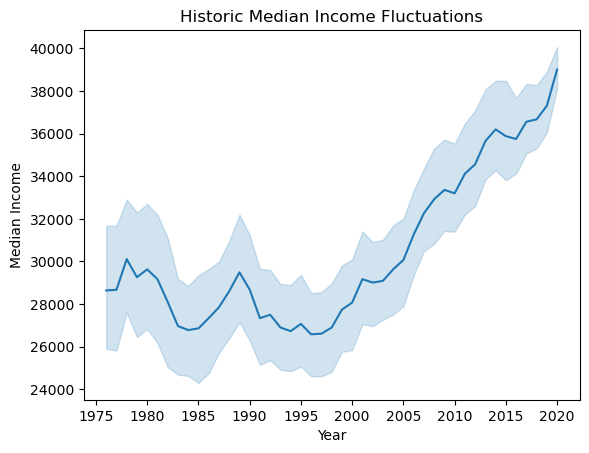

In [25]:
median_income.columns

# Create a line plot with seaborn
sns.lineplot(data=median_income, x="year", y="value")

# Set the plot title and labels
plt.title("Historic Median Income Fluctuations")
plt.xlabel("Year")
plt.ylabel("Median Income")

# Display the plot
plt.show()

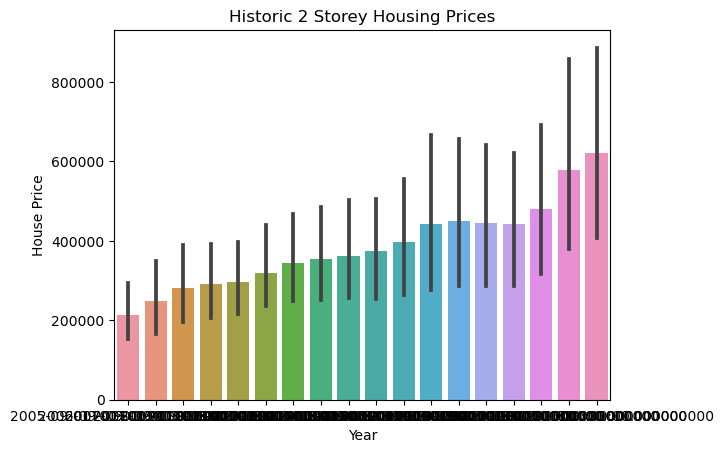

In [27]:
canada_housing.columns

# Create a line plot with seaborn
sns.barplot(data=canada_housing, x="year", y="two_storey")

# Set the plot title and labels
plt.title("Historic 2 Storey Housing Prices")
plt.xlabel("Year")
plt.ylabel("House Price")

# Display the plot
plt.show()

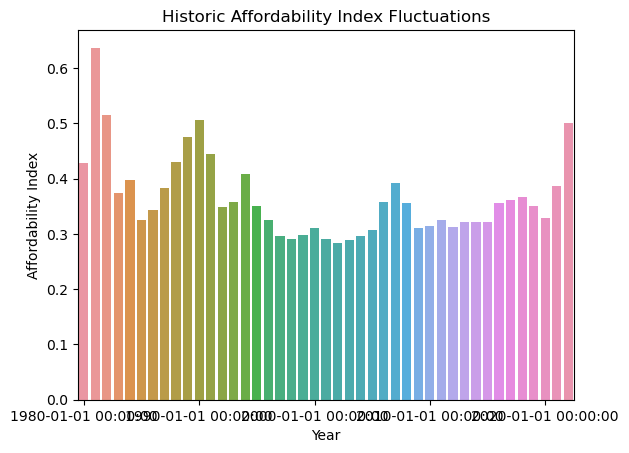

In [29]:
housing_affordability_index.columns

# Create a line plot with seaborn
sns.barplot(data=housing_affordability_index, x="date", y="INDINF_AFFORD")

# Set the plot title and labels
plt.title("Historic Affordability Index Fluctuations")
plt.xlabel("Year")
plt.ylabel("Affordability Index")
plt.xticks(range(0, len(housing_affordability_index), 10), housing_affordability_index['date'].iloc[::10])

# Display the plot
plt.show()